<a href="https://colab.research.google.com/github/soumik03/Major_Project_Bioinformatics/blob/main/CDD_ML_Part_6_Staphylococcus_aureus_QSAR_web_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QSAR Model Building of Staphylococcus aureus**



# Read in data

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('Staphylococcus_aureus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.096910
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.795880
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.820000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1.930000
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.872895
892,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.872895
893,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.872895
894,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.872895


In [4]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
892,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
893,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
894,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = dataset.iloc[:,-1]
Y

0      8.096910
1      7.795880
2      3.820000
3      1.930000
4      2.320000
         ...   
891    5.872895
892    5.872895
893    5.872895
894    5.872895
895    4.856985
Name: pIC50, Length: 896, dtype: float64

# Remove low variance features

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP3,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP23,...,PubchemFP756,PubchemFP758,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP819,PubchemFP821,PubchemFP824
0,1,0,1,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,0,1,1,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,1,1,1,0,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,1,1,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
892,1,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
893,1,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
894,1,1,1,1,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
X.to_csv('descriptor_list.csv', index = False)

In [ ]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.9157028293019406

## Model Prediction

In [10]:
Y_pred = model.predict(X)
Y_pred

array([7.54093192, 7.58555392, 3.69011385, 2.29486104, 2.42051428,
       2.35787262, 2.36283667, 3.10948321, 2.81998341, 2.04647244,
       3.54099696, 3.38972106, 1.88550207, 2.24142317, 2.05332106,
       2.08942628, 2.04647244, 2.42051428, 2.88273988, 3.0685927 ,
       3.54099696, 7.35048014, 7.31738403, 7.31738403, 7.13317626,
       7.13317626, 7.31738403, 7.35048014, 4.17642536, 7.31738403,
       7.63603851, 7.82591588, 7.26828069, 4.84674502, 4.17642536,
       7.17396579, 6.17893228, 7.76183345, 6.67006597, 6.05249762,
       6.67006597, 5.7681504 , 4.8306262 , 4.75381223, 4.76437059,
       3.99427199, 4.05803646, 4.29606321, 4.11466426, 4.34688795,
       4.42526894, 6.59525525, 7.42203393, 5.49552688, 5.62385041,
       6.57996153, 5.62497875, 6.71308296, 6.47140887, 6.48172536,
       6.44254702, 6.42315851, 6.53179966, 5.69804497, 5.44931767,
       6.3700995 , 6.10696496, 6.42315851, 6.69581307, 6.48279428,
       5.4757861 , 6.51499816, 6.7615015 , 5.62497875, 5.85215

## Model Performance

In [11]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.15
Coefficient of determination (R^2): 0.92


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

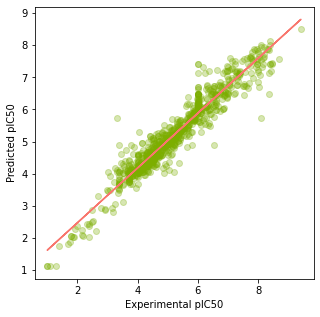

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [14]:
import pickle

In [16]:
pickle.dump(model, open('Staphylococcus_aureus.pkl', 'wb'))